# Set up

In [1]:
import tensorflow as tf
import tensorflow.keras as tfk
import numpy as np
import random

import augmentation as augh
import plotter as plot
import folding as fold

print("Libraries have been imported")

Libraries have been imported


# Dataset import 

In [2]:
data = np.load("/kaggle/input/marsterrain-general/dataset_general.npz")
images = data['images']
labels = data['labels']

shuffled_indices = np.random.permutation(len(images))
images = images[shuffled_indices]
labels = labels[shuffled_indices]

print(f"Dataset: {images.dtype}{images.shape} - {labels.dtype}{labels.shape}")

Dataset: uint8(2505, 64, 128) - uint8(2505, 64, 128)


# Example augmentation

Augmenting image 1207


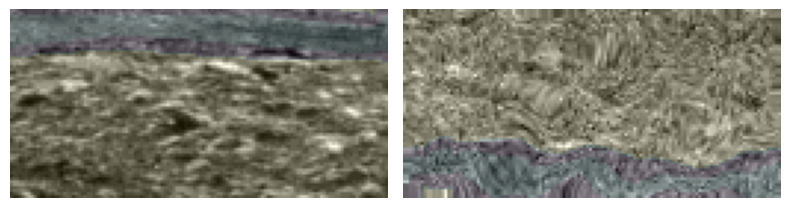

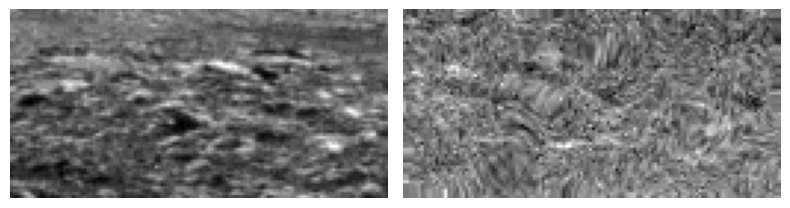

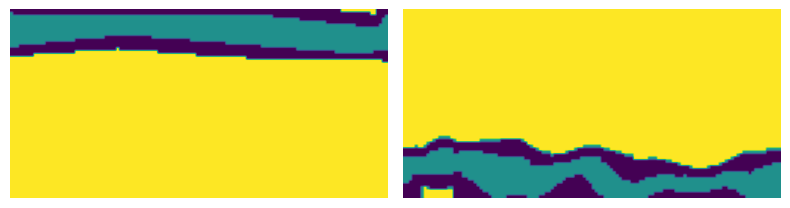

In [3]:
i = random.randint(0, len(labels))
print(f"Augmenting image {i}")

augmented_image, augmented_mask = augh.masked_augment(images[i], labels[i])

plot.plot_masked_image((images[i], labels[i]), (augmented_image, augmented_mask), mask_alpha=0.1)
plot.plot_masked_image((images[i], labels[i]), (augmented_image, augmented_mask), mask_alpha=0)
plot.plot_masked_image((images[i], labels[i]), (augmented_image, augmented_mask), mask_alpha=1)

# Augment dataset

In [4]:
augmented_data = augh.augment_masked_set(data)

Augmenting image 2505/2505


# Show classes presence

In [5]:
print(f"Total old images: {len(data['labels'])}")
print(f"Total new images: {len(augmented_data['labels'])}")

v = []
for label in labels:
    v = np.append(v, np.unique(label))
v = v.astype(int)
counts = np.bincount(v)
print(f"Old classes counts: {counts}")

v = []
for label in augmented_data['labels']:
    v = np.append(v, np.unique(label))
v = v.astype(int)
counts = np.bincount(v)
print(f"New classes counts: {counts}")

Total old images: 2505
Total new images: 4633
Old classes counts: [2087 1281 1160  863   63]
New classes counts: [3929 3240 2581 1901  277]


# Export dataset

In [17]:
np.savez("dataset_enhanced.npz", **augmented_data)

# Print some images

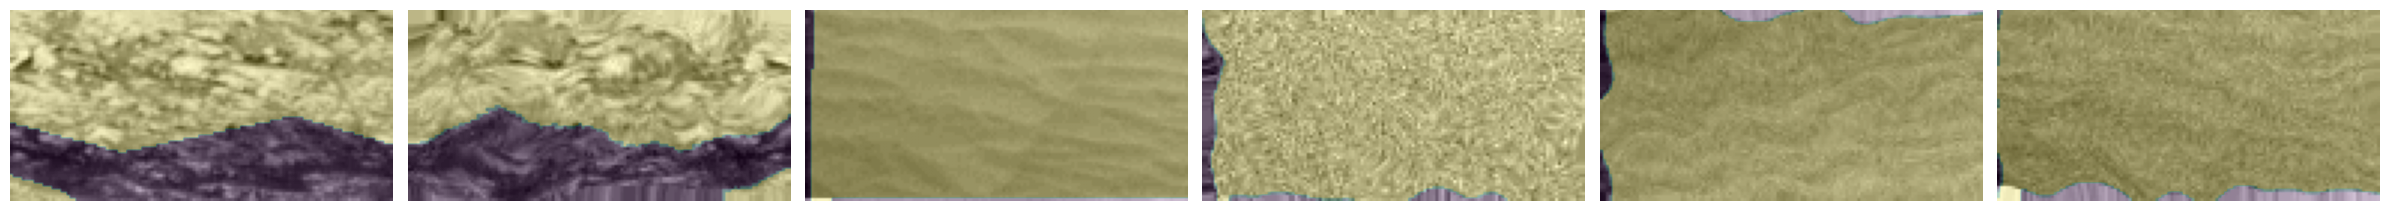

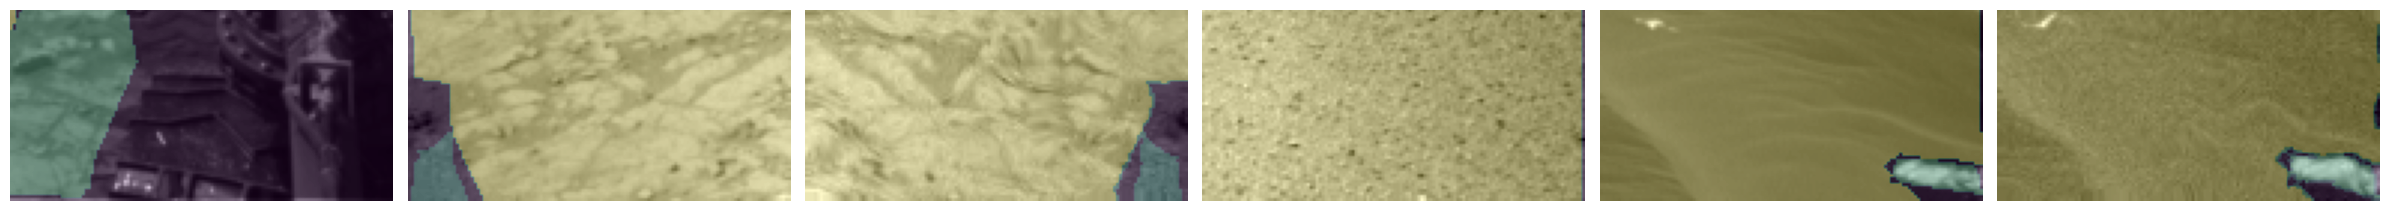

In [18]:
augmented_images = augmented_data['images']
augmented_labels = augmented_data['labels']
plot.plot_masked_images(augmented_images, augmented_labels, row=6)

# Split dataset

In [22]:
validation, training = fold.split_masked_set(augmented_data)

# Print example images after split

VALIDATION


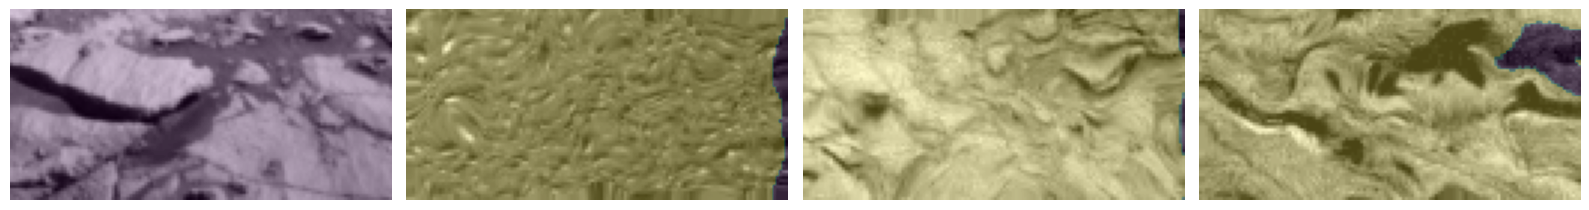

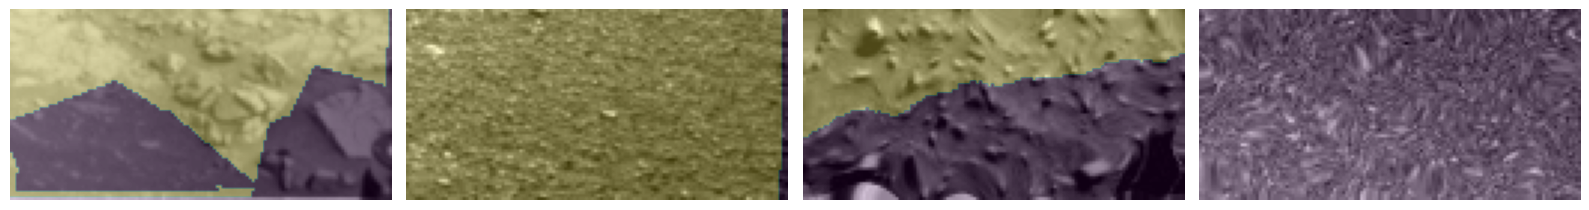

TRAINING


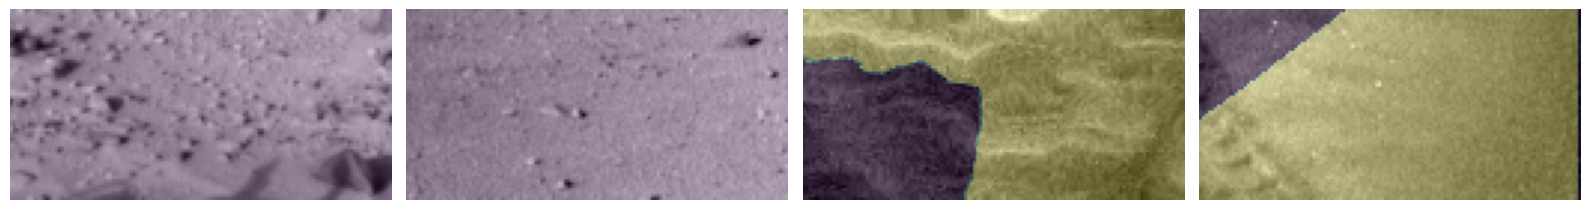

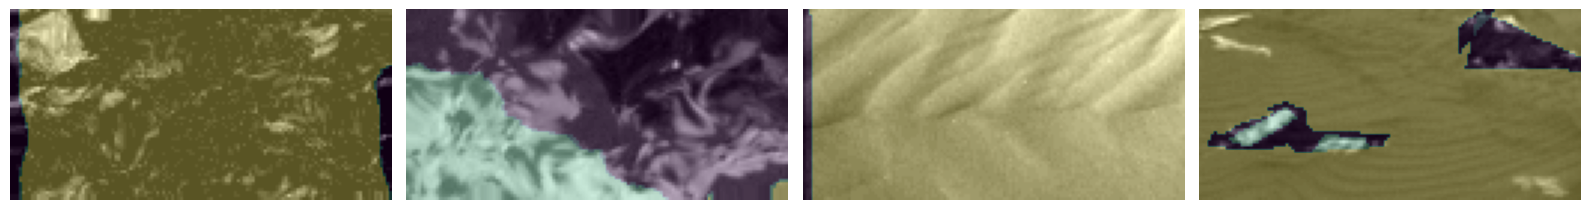

In [23]:
print("VALIDATION")
plot.plot_masked_images(validation['images'], validation['labels'])
print("TRAINING")
plot.plot_masked_images(training['images'], training['labels'])